## Question 2

### Preparing the data

In [217]:
import numpy as np
# pandas handles dataframes (exactly the same as tables in Matlab)
import pandas as pd
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# stats models is a package that is going to perform the regression analysis
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
import scipy
# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
# self explainatory, dates and times
from datetime import datetime, date
# a helper package to help us iterate over objects
import itertools
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# np.set_printoptions(threshold=np.inf)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
from sklearn.preprocessing import normalize

In [218]:
movies = pd.read_csv(r'D:\Assignment_1B_Data\Data\Q2\movies.csv')
ratings = pd.read_csv(r'D:\Assignment_1B_Data\Data\Q2\ratings.csv')
del ratings['timestamp']
movieRating = ratings.merge(movies, left_on='movieId', right_on='movieId')
movieRating


userId  movieId  rating                             title  \
0            1        1     4.0                  Toy Story (1995)   
1            5        1     4.0                  Toy Story (1995)   
2            7        1     4.5                  Toy Story (1995)   
3           15        1     2.5                  Toy Story (1995)   
4           17        1     4.5                  Toy Story (1995)   
...        ...      ...     ...                               ...   
100831     610   160341     2.5                  Bloodmoon (1997)   
100832     610   160527     4.5  Sympathy for the Underdog (1971)   
100833     610   160836     3.0                     Hazard (2005)   
100834     610   163937     3.5                Blair Witch (2016)   
100835     610   163981     3.5                         31 (2016)   

                                             genres  
0       Adventure|Animation|Children|Comedy|Fantasy  
1       Adventure|Animation|Children|Comedy|Fantasy  
2       Adventure|Animation|Children|Comedy|Fantasy  
3       Adventure|Animation|Children|Comedy|Fantasy  
4       Adventure|Animation|Children|Comedy|Fantasy  
...                                             ...  
100831                              Action|Thriller  
100832                           Action|Crime|Drama  
100833                        Action|Drama|Thriller  
100834                              Horror|Thriller  
100835                                       Horror  

[100836 rows x 5 columns]

In [219]:
from sklearn.cluster import KMeans

In [231]:
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
pd.set_option('display.max_rows', 500)
top_1000_movies = pd.DataFrame()
top_1000_movies = movieRating['title'].value_counts().index.tolist()[:1000]
# reviews_for_top_1000 = top_1000_movies.merge(movieRating, left_on='title', right_on='title')
user_movie_ratings.drop(user_movie_ratings.columns.difference(top_1000_movies), 1, inplace=True)
u = user_movie_ratings.isnull().sum(axis=1)
u.head(500)

userId
1      837
2      978
3      979
4      875
5      963
6      855
7      882
8      953
9      981
10     927
11     949
12     974
13     978
14     960
15     882
16     919
17     906
18     659
19     655
20     854
21     751
22     900
23     933
24     907
25     981
26     979
27     908
28     690
29     943
30     969
31     958
32     923
33     909
34     930
35     979
36     963
37     979
38     927
39     914
40     927
41     834
42     741
43     917
44     967
45     701
46     958
47     917
48     969
49     982
50     860
51     809
52     905
53     993
54     971
55     977
56     956
57     691
58     902
59     926
60     980
61     963
62     774
63     765
64     579
65     969
66     785
67     969
68     256
69     961
70     954
71     970
72     963
73     872
74     930
75     943
76     899
77     971
78     954
79     955
80     891
81     974
82     841
83     912
84     833
85     991
86     942
87     987
88     952
89     883
90     980
91 

In [205]:

user_movie_ratings = user_movie_ratings.T
user_movie_ratings = user_movie_ratings.apply(lambda row: row.fillna(row.mean()), axis=1)
user_movie_ratings = user_movie_ratings.T

# data_scaled = preprocessing.scale(user_movie_ratings)
# data_scaled = pd.DataFrame(data_scaled, columns=user_movie_ratings.columns)
data_scaled = user_movie_ratings
user_movie_ratings

title   (500) Days of Summer (2009)  10 Things I Hate About You (1999)  \
userId                                                                   
1                          3.666667                           3.527778   
2                          3.666667                           3.527778   
3                          3.666667                           3.527778   
4                          3.666667                           3.527778   
5                          3.666667                           3.527778   
...                             ...                                ...   
606                        3.666667                           3.527778   
607                        3.666667                           3.527778   
608                        3.666667                           3.527778   
609                        3.666667                           3.527778   
610                        3.500000                           3.527778   

title   101 Dalmatians (1996)  \
userId                          
1                    3.074468   
2                    3.074468   
3                    3.074468   
4                    3.074468   
5                    3.074468   
...                       ...   
606                  3.074468   
607                  3.074468   
608                  3.074468   
609                  3.074468   
610                  3.074468   

title   101 Dalmatians (One Hundred and One Dalmatians) (1961)  \
userId                                                           
1                                                3.431818        
2                                                3.431818        
3                                                3.431818        
4                                                3.431818        
5                                                3.431818        
...                                                   ...        
606                                              3.431818        
607                                              3.431818        
608                                              3.431818        
609                                              3.431818        
610                                              3.431818        

title   12 Angry Men (1957)  2001: A Space Odyssey (1968)  \
userId                                                      
1                  4.149123                      3.894495   
2                  4.149123                      3.894495   
3                  4.149123                      3.894495   
4                  5.000000                      3.894495   
5                  4.149123                      3.894495   
...                     ...                           ...   
606                4.149123                      5.000000   
607                4.149123                      3.894495   
608                4.149123                      3.000000   
609                4.149123                      3.894495   
610                4.149123                      4.500000   

title   21 Jump Street (2012)  28 Days Later (2002)  300 (2007)  \
userId                                                            
1                    3.865385              3.974138     3.68125   
2                    3.865385              3.974138     3.68125   
3                    3.865385              3.974138     3.68125   
4                    3.865385              3.974138     3.68125   
5                    3.865385              3.974138     3.68125   
...                       ...                   ...         ...   
606                  3.865385              3.974138     3.68125   
607                  3.865385              3.974138     3.68125   
608                  3.865385              3.500000     5.00000   
609                  3.865385              3.974138     3.68125   
610                  3.865385              5.000000     4.00000   

title   40-Year-Old Virgin, The (2005)  50 First Dates (2004)  8 Mile (2002)  \
us

In [104]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(500, 200))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [105]:
from sklearn.cluster import AgglomerativeClustering 
y_hc = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage ='ward')
y_hc.fit_predict(data_scaled)
labels = y_hc.labels_
labels = pd.DataFrame(data=labels, dtype=np.int8)
data_scaled['Cluster'] = labels
data_scaled['Cluster'].value_counts()

cluster_centroids = data_scaled.groupby(['Cluster'])[data_scaled.columns].mean()
del cluster_centroids['Cluster']
# data_scaled = ratings.merge(movies, left_on='movieId', right_on='movieId')
# cluster_centroids.isnull().sum().sum()
del data_scaled['Cluster']

In [106]:
predictions = KMeans(n_clusters=8, algorithm = "auto", n_init=1, init = cluster_centroids).fit(data_scaled)

In [107]:
predictions.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True,
       init=title    (500) Days of Summer (2009)  10 Things I Hate About You (1999)  \
Cluster                                                                   
0.0                         3.659091                           3.510354   
1.0                         3.671111                           3.531481   
2.0                         3.670290                           3.492150   
3.0                         3.650000                           3.597222   
4.0                         3.677966                           3.541902   
5.0                         3.695473                           3.501029   
6.0                         3.639303                           3.541874   
7.0                         3.672727                           3.535859   

title    101 Dalmatians (1996)  \
Cluster                          
0.0                   3.086557   
1.0                   3.081844   
2.0                   3.100601   
3.0                   3.01595

In [194]:
predictions.labels_

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,

In [108]:
data_scaled['Cluster_Kmeans'] = predictions.labels_
KMeans_cluster_centroids = data_scaled.groupby(['Cluster_Kmeans'])[data_scaled.columns].mean()
KMeans_cluster_centroids

title           (500) Days of Summer (2009)  \
Cluster_Kmeans                                
0                                  3.664583   
1                                  3.675105   
2                                  3.693333   
3                                  3.650901   
4                                  3.653680   
5                                  3.689189   
6                                  3.650463   
7                                  3.656118   

title           10 Things I Hate About You (1999)  101 Dalmatians (1996)  \
Cluster_Kmeans                                                             
0                                        3.504861               3.074202   
1                                        3.530591               3.112173   
2                                        3.558519               3.106525   
3                                        3.580330               3.025877   
4                                        3.485570               3.072534   
5                                        3.477853               3.107964   
6                                        3.554398               3.019651   
7                                        3.533404               3.072583   

title           101 Dalmatians (One Hundred and One Dalmatians) (1961)  \
Cluster_Kmeans                                                           
0                                                        3.429830        
1                                                        3.464902        
2                                                        3.445758        
3                                                        3.449939        
4                                                        3.408501        
5                                                        3.436425        
6                                                        3.388889        
7                                                        3.428078        

title           12 Angry Men (1957)  2001: A Space Odyssey (1968)  \
Cluster_Kmeans                                                      
0                          4.119189                      3.912959   
1                          4.165001                      3.888863   
2                          4.155205                      3.889969   
3                          4.166074                      3.920841   
4                          4.151857                      3.858334   
5                          4.168800                      3.886003   
6                          4.142300                      3.818170   
7                          4.127026                      3.973813   

title           21 Jump Street (2012)  28 Days Later (2002)  300 (2007)  \
Cluster_Kmeans                                                            
0                            3.837981              3.971121    3.708594   
1                            3.864167              4.007420    3.656566   
2                            3.868974              3.970230    3.734667   
3                            3.887994              3.983691    3.643243   
4                            3.841658              3.950515    3.651218   
5                            3.867204              3.989049    3.632179   
6                            3.884882              3.956537    3.711632   
7                            3.873418              3.963771    3.710680   

title           40-Year-Old Virgin, The (2005)  50 First Dates (2004)  \
Cluster_Kmeans                                                          
0                                     3.490203               3.503457   
1                                     3.540712               3.554807   
2                                     3.594324               3.569645   
3                                     3.533510               3.577343   
4                                     3.566515               3.560652   
5                                     3.476534               3.537522   
6

In [109]:
data_scaled['userId'] = np.arange(start=1, stop=611, step=1)
data_scaled[data_scaled['userId'] == 42]

title   (500) Days of Summer (2009)  10 Things I Hate About You (1999)  \
userId                                                                   
42                         3.666667                           3.527778   

title   101 Dalmatians (1996)  \
userId                          
42                   3.074468   

title   101 Dalmatians (One Hundred and One Dalmatians) (1961)  \
userId                                                           
42                                               3.431818        

title   12 Angry Men (1957)  2001: A Space Odyssey (1968)  \
userId                                                      
42                 4.149123                           5.0   

title   21 Jump Street (2012)  28 Days Later (2002)  300 (2007)  \
userId                                                            
42                   3.865385              3.974138     3.68125   

title   40-Year-Old Virgin, The (2005)  50 First Dates (2004)  8 Mile (2002)  \
userId                                                                         
42                            3.547297               3.553191       3.292683   

title   A.I. Artificial Intelligence (2001)  About a Boy (2002)  \
userId                                                            
42                                 3.339286            3.715909   

title   Abyss, The (1989)  Ace Ventura: Pet Detective (1994)  \
userId                                                         
42                    4.0                                2.0   

title   Ace Ventura: When Nature Calls (1995)  Adaptation (2002)  \
userId                                                             
42                                        2.0           3.945652   

title   Addams Family Values (1993)  Addams Family, The (1991)  \
userId                                                           
42                              2.0                   3.289474   

title   Adventures of Priscilla, Queen of the Desert, The (1994)  \
userId                                                             
42                                               3.597222          

title   African Queen, The (1951)  Air Force One (1997)  Airheads (1994)  \
userId                                                                     
42                       3.970588                   4.0              2.0   

title   Airplane! (1980)  ...  Wild Wild West (1999)  \
userId                    ...                          
42                   5.0  ...               2.207547   

title   William Shakespeare's Romeo + Juliet (1996)  Willow (1988)  \
userId                                                               
42                                         3.722222         3.3375   

title   Willy Wonka & the Chocolate Factory (1971)  Witness (1985)  \
userId                                                               
42                                         3.87395             3.0   

title   Wizard of Oz, The (1939)  Wolf of Wall Street, The (2013)  \
userId                                                              
42                      3.880435                         3.916667   

title   World Is Not Enough, The (1999)  Wrestler, The (2008)  \
userId                                                          
42                                  5.0              3.735294   

title   X-Files: Fight the Future, The (1998)  X-Men (2000)  \
userId                                                        
42                                   3.440476           2.0   

title   X-Men Origins: Wolverine (2009)  X-Men: Days of Future Past (2014)  \
userId                                                                       
42                             2.865385                           3.833333   

title   X-Men: First Class (2011)  X-Men: The Last Stand (2006)  \
userId                                                            
42                       3.790698                      3.355769 

In [193]:
pd.set_option('display.max_rows', 500)
data_scaled.head(100)

title   (500) Days of Summer (2009)  10 Things I Hate About You (1999)  \
userId                                                                   
1                          3.666667                           3.527778   
2                          3.666667                           3.527778   
3                          3.666667                           3.527778   
4                          3.666667                           3.527778   
5                          3.666667                           3.527778   
6                          3.666667                           3.527778   
7                          3.666667                           3.527778   
8                          3.666667                           3.527778   
9                          3.666667                           3.527778   
10                         3.666667                           3.527778   
11                         3.666667                           3.527778   
12                         3.666667                           5.000000   
13                         3.666667                           3.527778   
14                         3.666667                           3.527778   
15                         4.000000                           3.527778   
16                         3.666667                           3.527778   
17                         3.666667                           3.527778   
18                         4.000000                           3.527778   
19                         3.666667                           3.000000   
20                         3.666667                           3.527778   
21                         3.666667                           3.527778   
22                         0.500000                           3.527778   
23                         3.666667                           3.527778   
24                         3.666667                           3.527778   
25                         3.666667                           3.527778   
26                         3.666667                           3.527778   
27                         3.666667                           3.527778   
28                         3.666667                           3.527778   
29                         3.666667                           3.527778   
30                         3.666667                           3.527778   
31                         3.666667                           3.527778   
32                         3.666667                           3.527778   
33                         3.666667                           3.527778   
34                         3.666667                           3.527778   
35                         3.666667                           3.527778   
36                         3.666667                           3.527778   
37                         3.666667                           3.527778   
38                         3.666667                           3.527778   
39                         3.666667                           3.527778   
40                         3.666667                           3.527778   
41                         3.500000                           3.527778   
42                         3.666667                           3.527778   
43                         3.666667                           3.527778   
44                         3.666667                           3.527778   
45                         3.666667                           3.527778   
46                         3.666667                           3.527778   
47                         3.666667                           3.527778   
48                         3.666667                           3.527778   
49                         3.666667                           3.527778   
50                         3.666667                           3.527778   
51                         3.666667                           3.527778   
52                         3.666667                           3.527778   
53  

In [110]:
pd.set_option('display.max_rows', 200)

def ranking_cluster(cluster_num, KMeans_cluster_centroids, movieRatings, userId, movieRatingmovie, movies):
#     rated = pd.DataFrame()
#     rated['title'] = movieRating[movieRating['userId'] == userId]['title'].unique()

    df = KMeans_cluster_centroids.T
    df = df[cluster_num].sort_values(ascending=False).reset_index()
    df = df.drop([0,1])
    
    
    df = df.merge(movies, left_on='title', right_on='title')
    df['Rating'] = df[cluster_num]
    del df[cluster_num]

    return df
#     print(KMeans_cluster_centroids[KMeans_cluster_centroids['Cluster_Kmeans'] == cluster_num].max())


df = ranking_cluster(1, KMeans_cluster_centroids, movieRating, 42, movieRating, movies)
df.head(100)
rated = pd.DataFrame()
rated['title'] = movieRating[movieRating['userId'] == 42]['title'].unique()
df.head(100)


title  movieId  \
0                               Godfather, The (1972)      858   
1                      Godfather: Part II, The (1974)     1221   
2       Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)      922   
3                                 Forrest Gump (1994)      356   
4                          Princess Bride, The (1987)     1197   
5                                Departed, The (2006)    48516   
6                             Harold and Maude (1971)     1235   
7                                  Hoop Dreams (1994)      246   
8   Star Wars: Episode V - The Empire Strikes Back...     1196   
9                                   Fight Club (1999)     2959   
10                   Manchurian Candidate, The (1962)     1267   
11                              Cool Hand Luke (1967)     1276   
12                                 Rear Window (1954)      904   
13                     Philadelphia Story, The (1940)      898   
14                          American History X (1998)     2329   
15  Dr. Strangelove or: How I Learned to Stop Worr...      750   
16                                   Chinatown (1974)     1252   
17          Star Wars: Episode IV - A New Hope (1977)      260   
18             Monty Python and the Holy Grail (1975)     1136   
19                                  Goodfellas (1990)     1213   
20  Raiders of the Lost Ark (Indiana Jones and the...     1198   
21                          Lawrence of Arabia (1962)     1204   
22                        Boondock Saints, The (2000)     3275   
23                            Schindler's List (1993)      527   
24                            Dark Knight, The (2008)    58559   
25                       Boot, Das (Boat, The) (1981)     1233   
26                                  Casablanca (1942)      912   
27                              Reservoir Dogs (1992)     1089   
28                              Apocalypse Now (1979)     1208   
29         Life Is Beautiful (La Vita è bella) (1997)     2324   
30                                 Raging Bull (1980)     1228   
31                                     Amadeus (1984)     1225   
32                             Green Mile, The (1999)     3147   
33                                      Brazil (1985)     1199   
34  Spirited Away (Sen to Chihiro no kamikakushi) ...     5618   
35  Amelie (Fabuleux destin d'Amélie Poulain, Le) ...     4973   
36                                       Glory (1989)     1242   
37                                Pulp Fiction (1994)      296   
38                             Rosemary's Baby (1968)     2160   
39                                      Snatch (2000)     4011   
40        Seven Samurai (Shichinin no samurai) (1954)     2019   
41                                   In Bruges (2008)    57669   
42                                12 Angry Men (1957)     1203   
43  For a Few Dollars More (Per qualche dollaro in...     3681   
44                          North by Northwest (1959)      908   
45  Good, the Bad and the Ugly, The (Buono, il bru...     1201   
46                         Usual Suspects, The (1995)       50   
47                                Office Space (1999)     2502   
48                           Great Escape, The (1963)     1262   
49                                       Fargo (1996)      608   
50         Ghost in the Shell (Kôkaku kidôtai) (1995)      741   
51                         There Will Be Blood (2007)    56782   
52       Eternal Sunshine of the Spotless Mind (2004)     7361   
53     Cinema Paradiso (Nuovo cinema Paradiso) (1989)     1172   
54                City of God (Cidade de Deus) (2002)     6016   
55                                      Patton (1970)     1272   
56             One Flew Over the Cuckoo's Nest (1975)     1193   
57                                  Unforgiven (1992)     1266   
58                                 Matrix, The (1999)     2571   
59  Lord of the Rings: The Return of the King, The...     7153   
60                    

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

def heatmap_plot(data_scaled, cluster_num):
    df_heatmap = data_scaled[data_scaled['Cluster_Kmeans'] == cluster_num]
    # df_heatmap = df.merge(movies, left_on='title', right_on='title')
    del df_heatmap['userId']
    del df_heatmap['Cluster_Kmeans']
    print(df_heatmap.shape[0])
    # heatmap["movieId"] = df_heatmap["movieId"]
    # heatmap["userId"] = df_heatmap["userId"]
    cols = list(df.columns.values)
    df_heatmap = df_heatmap.iloc[:, : 50]

    # del heatmap["title"]
    # del heatmap["genres"]
    # df_heatmap
    fig, ax = plt.subplots(figsize=(50,20))         # Sample figsize in inches
    sns.heatmap(df_heatmap[:20], ax=ax) 

80


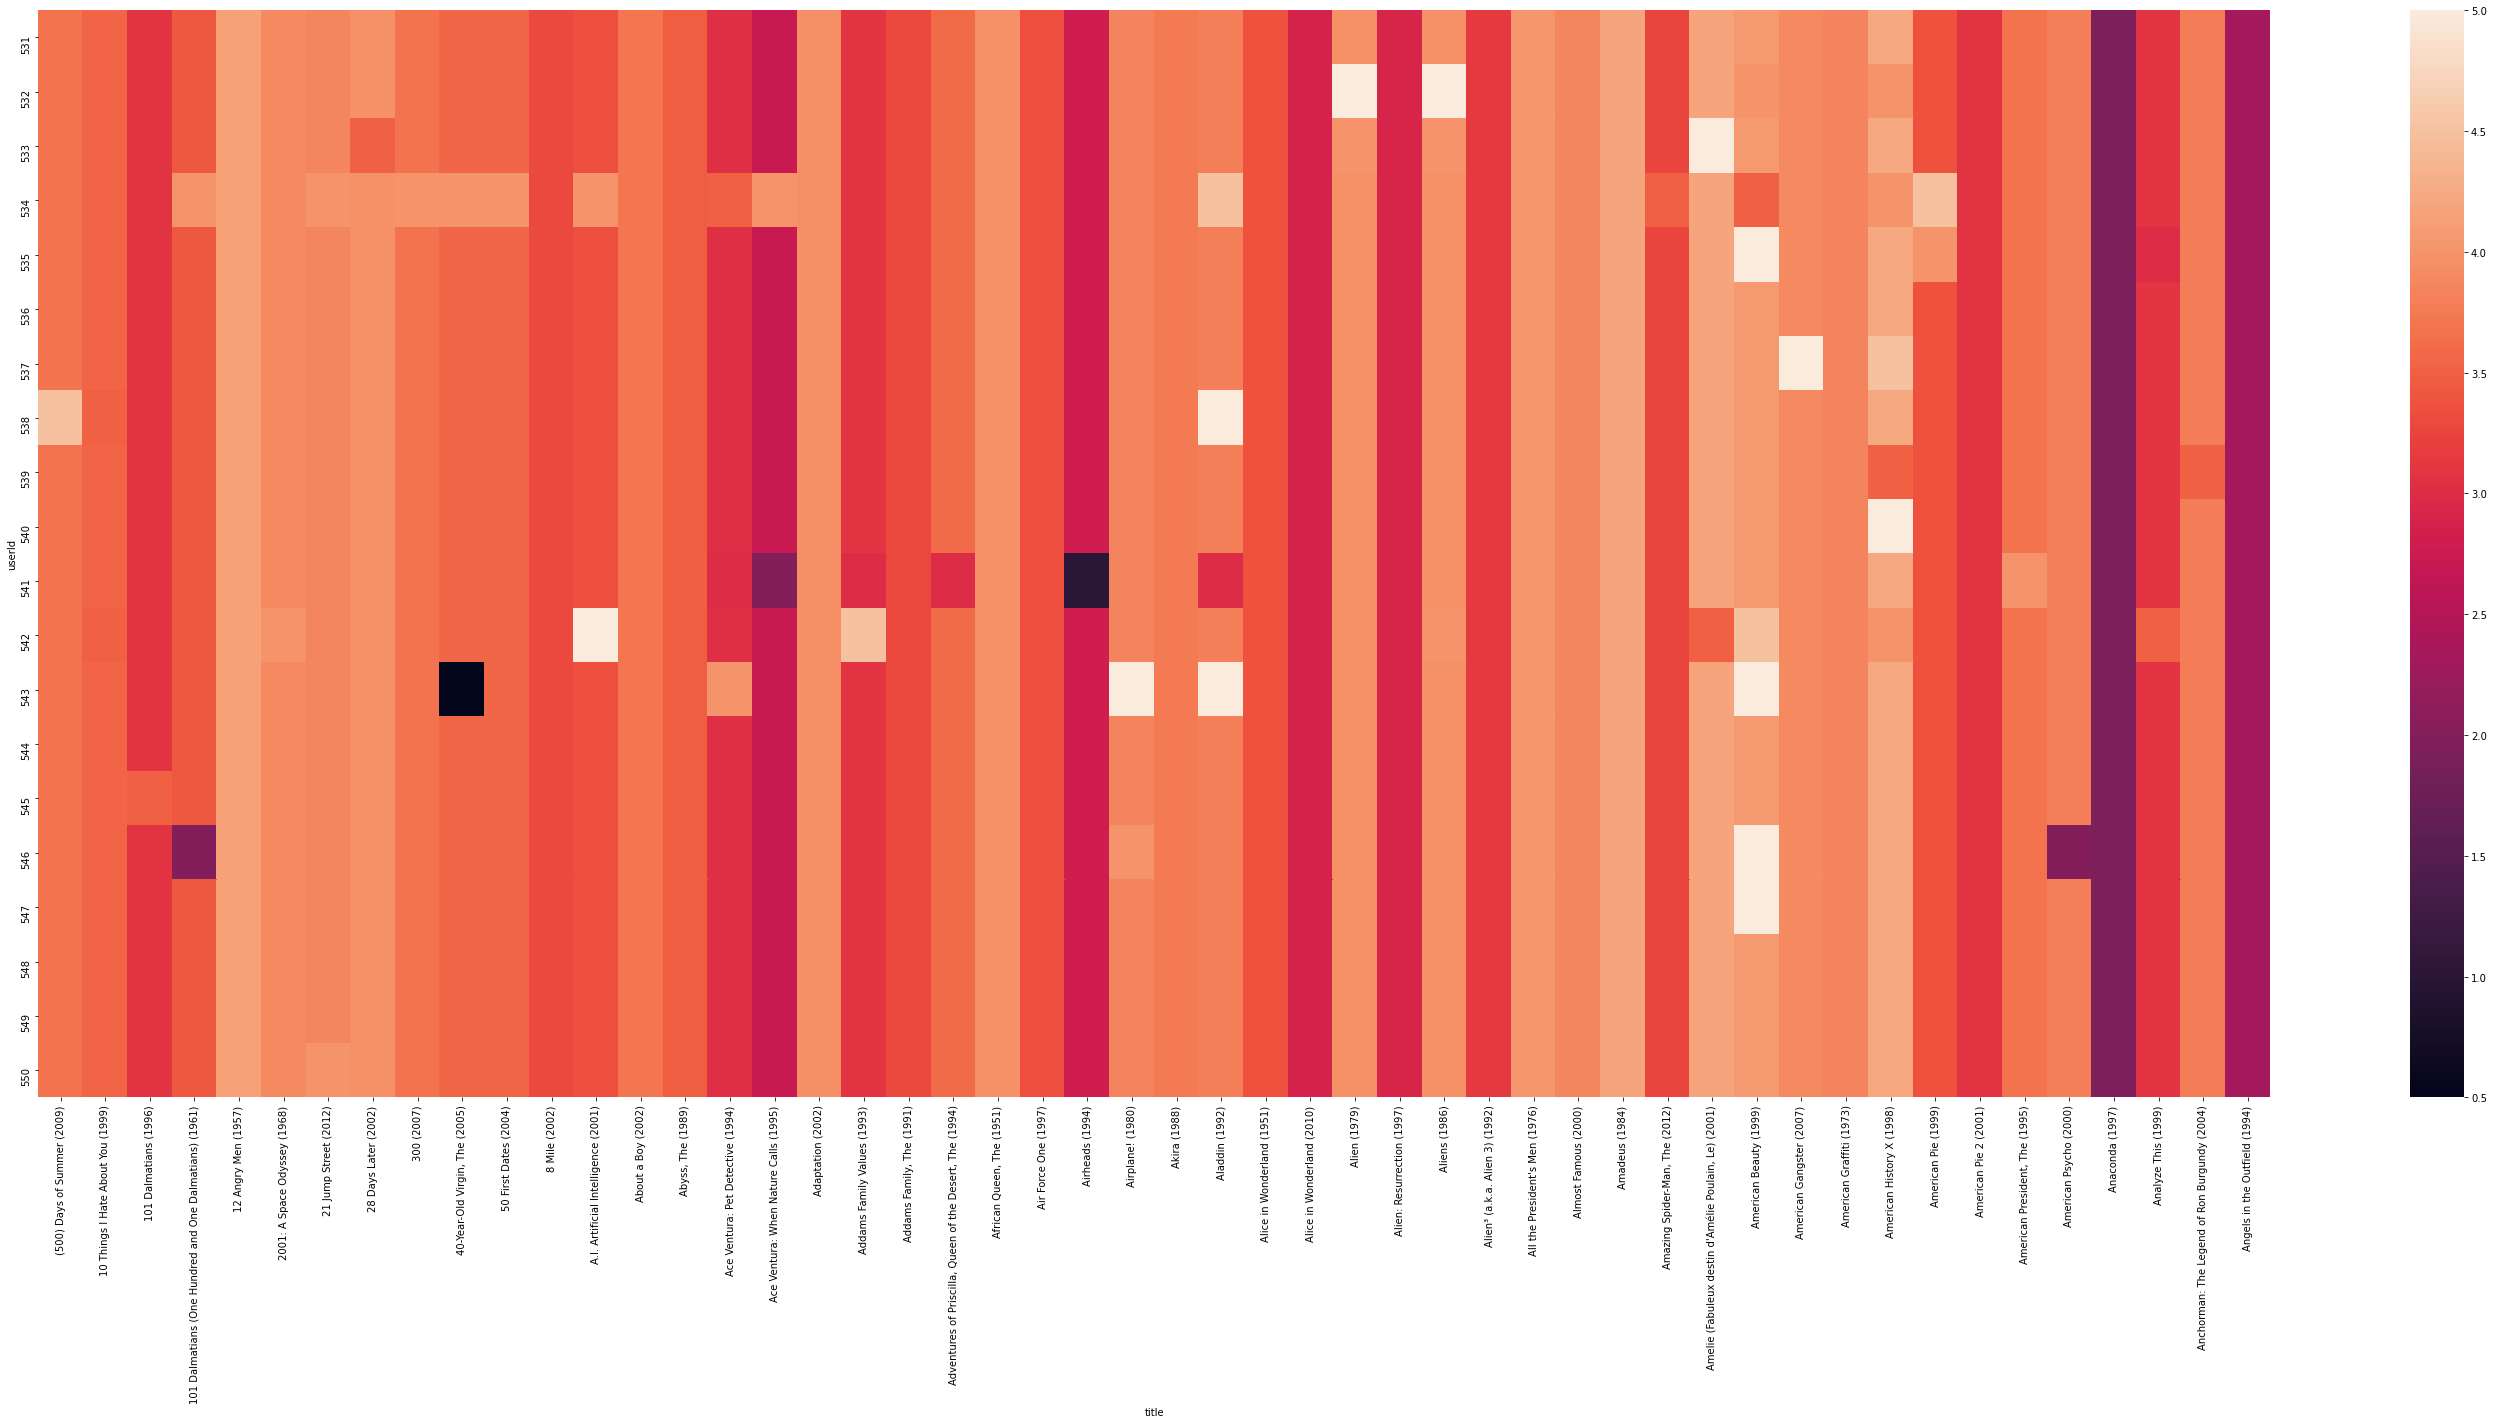

In [181]:
heatmap_plot(data_scaled, 0)

79


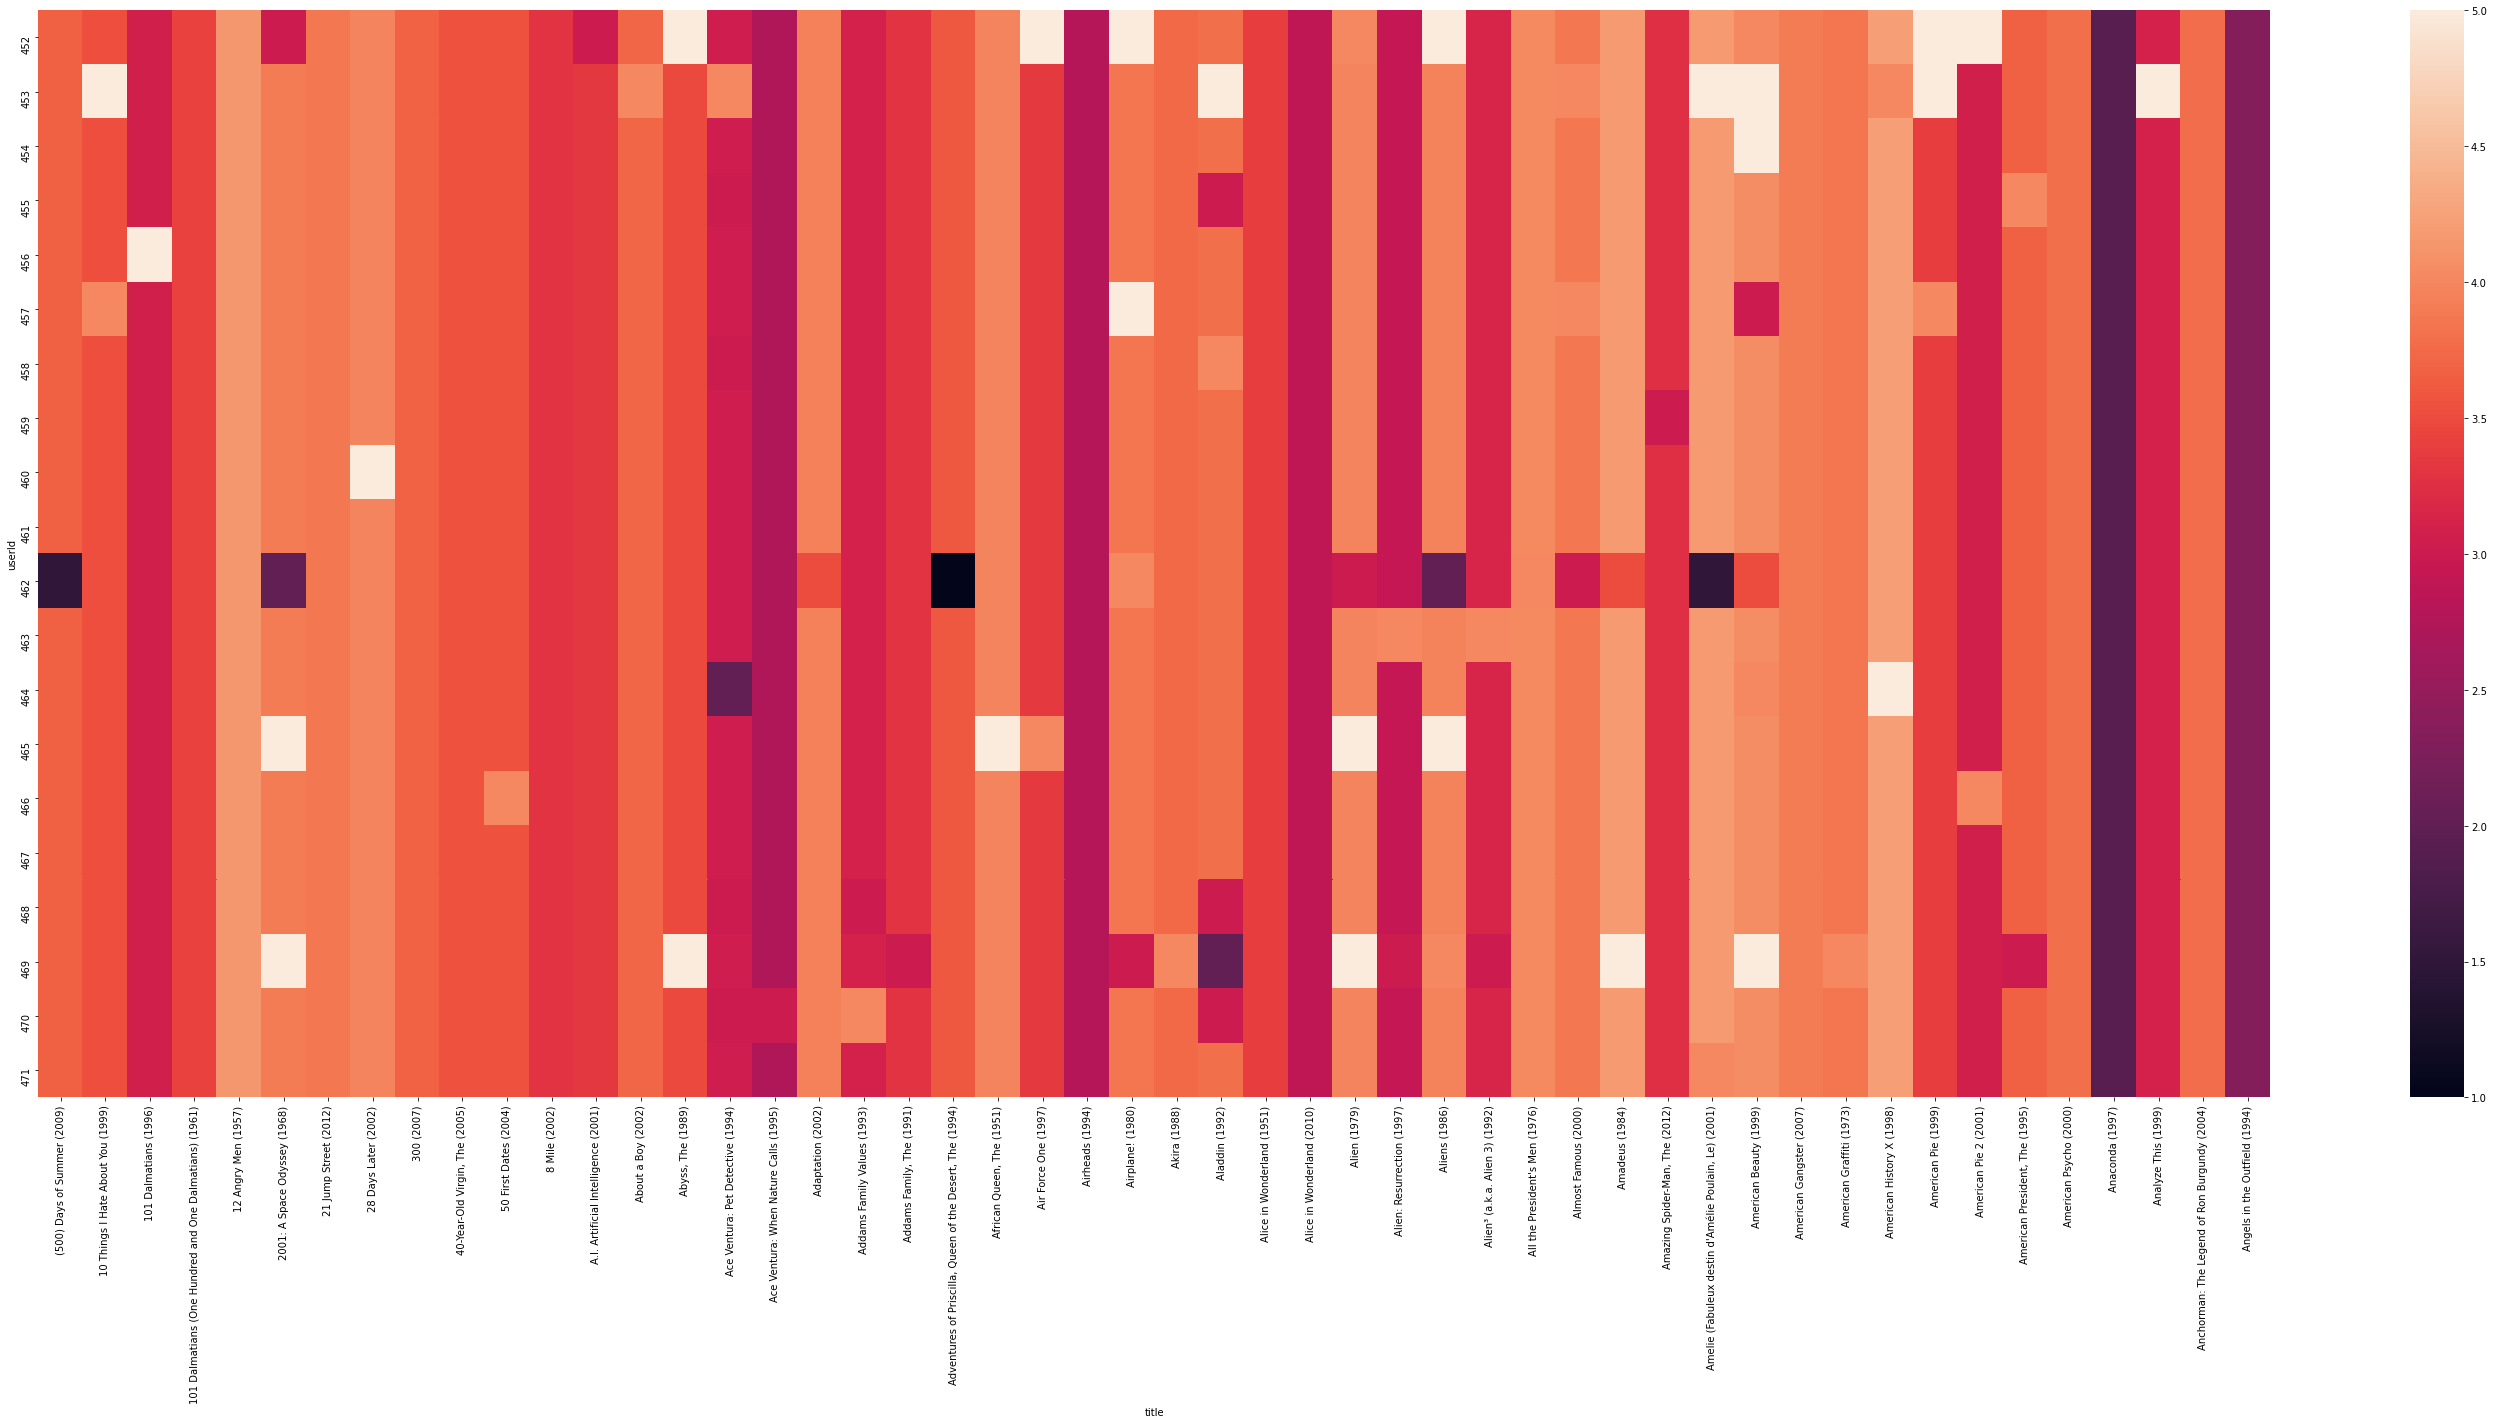

In [182]:
heatmap_plot(data_scaled, 1)


75


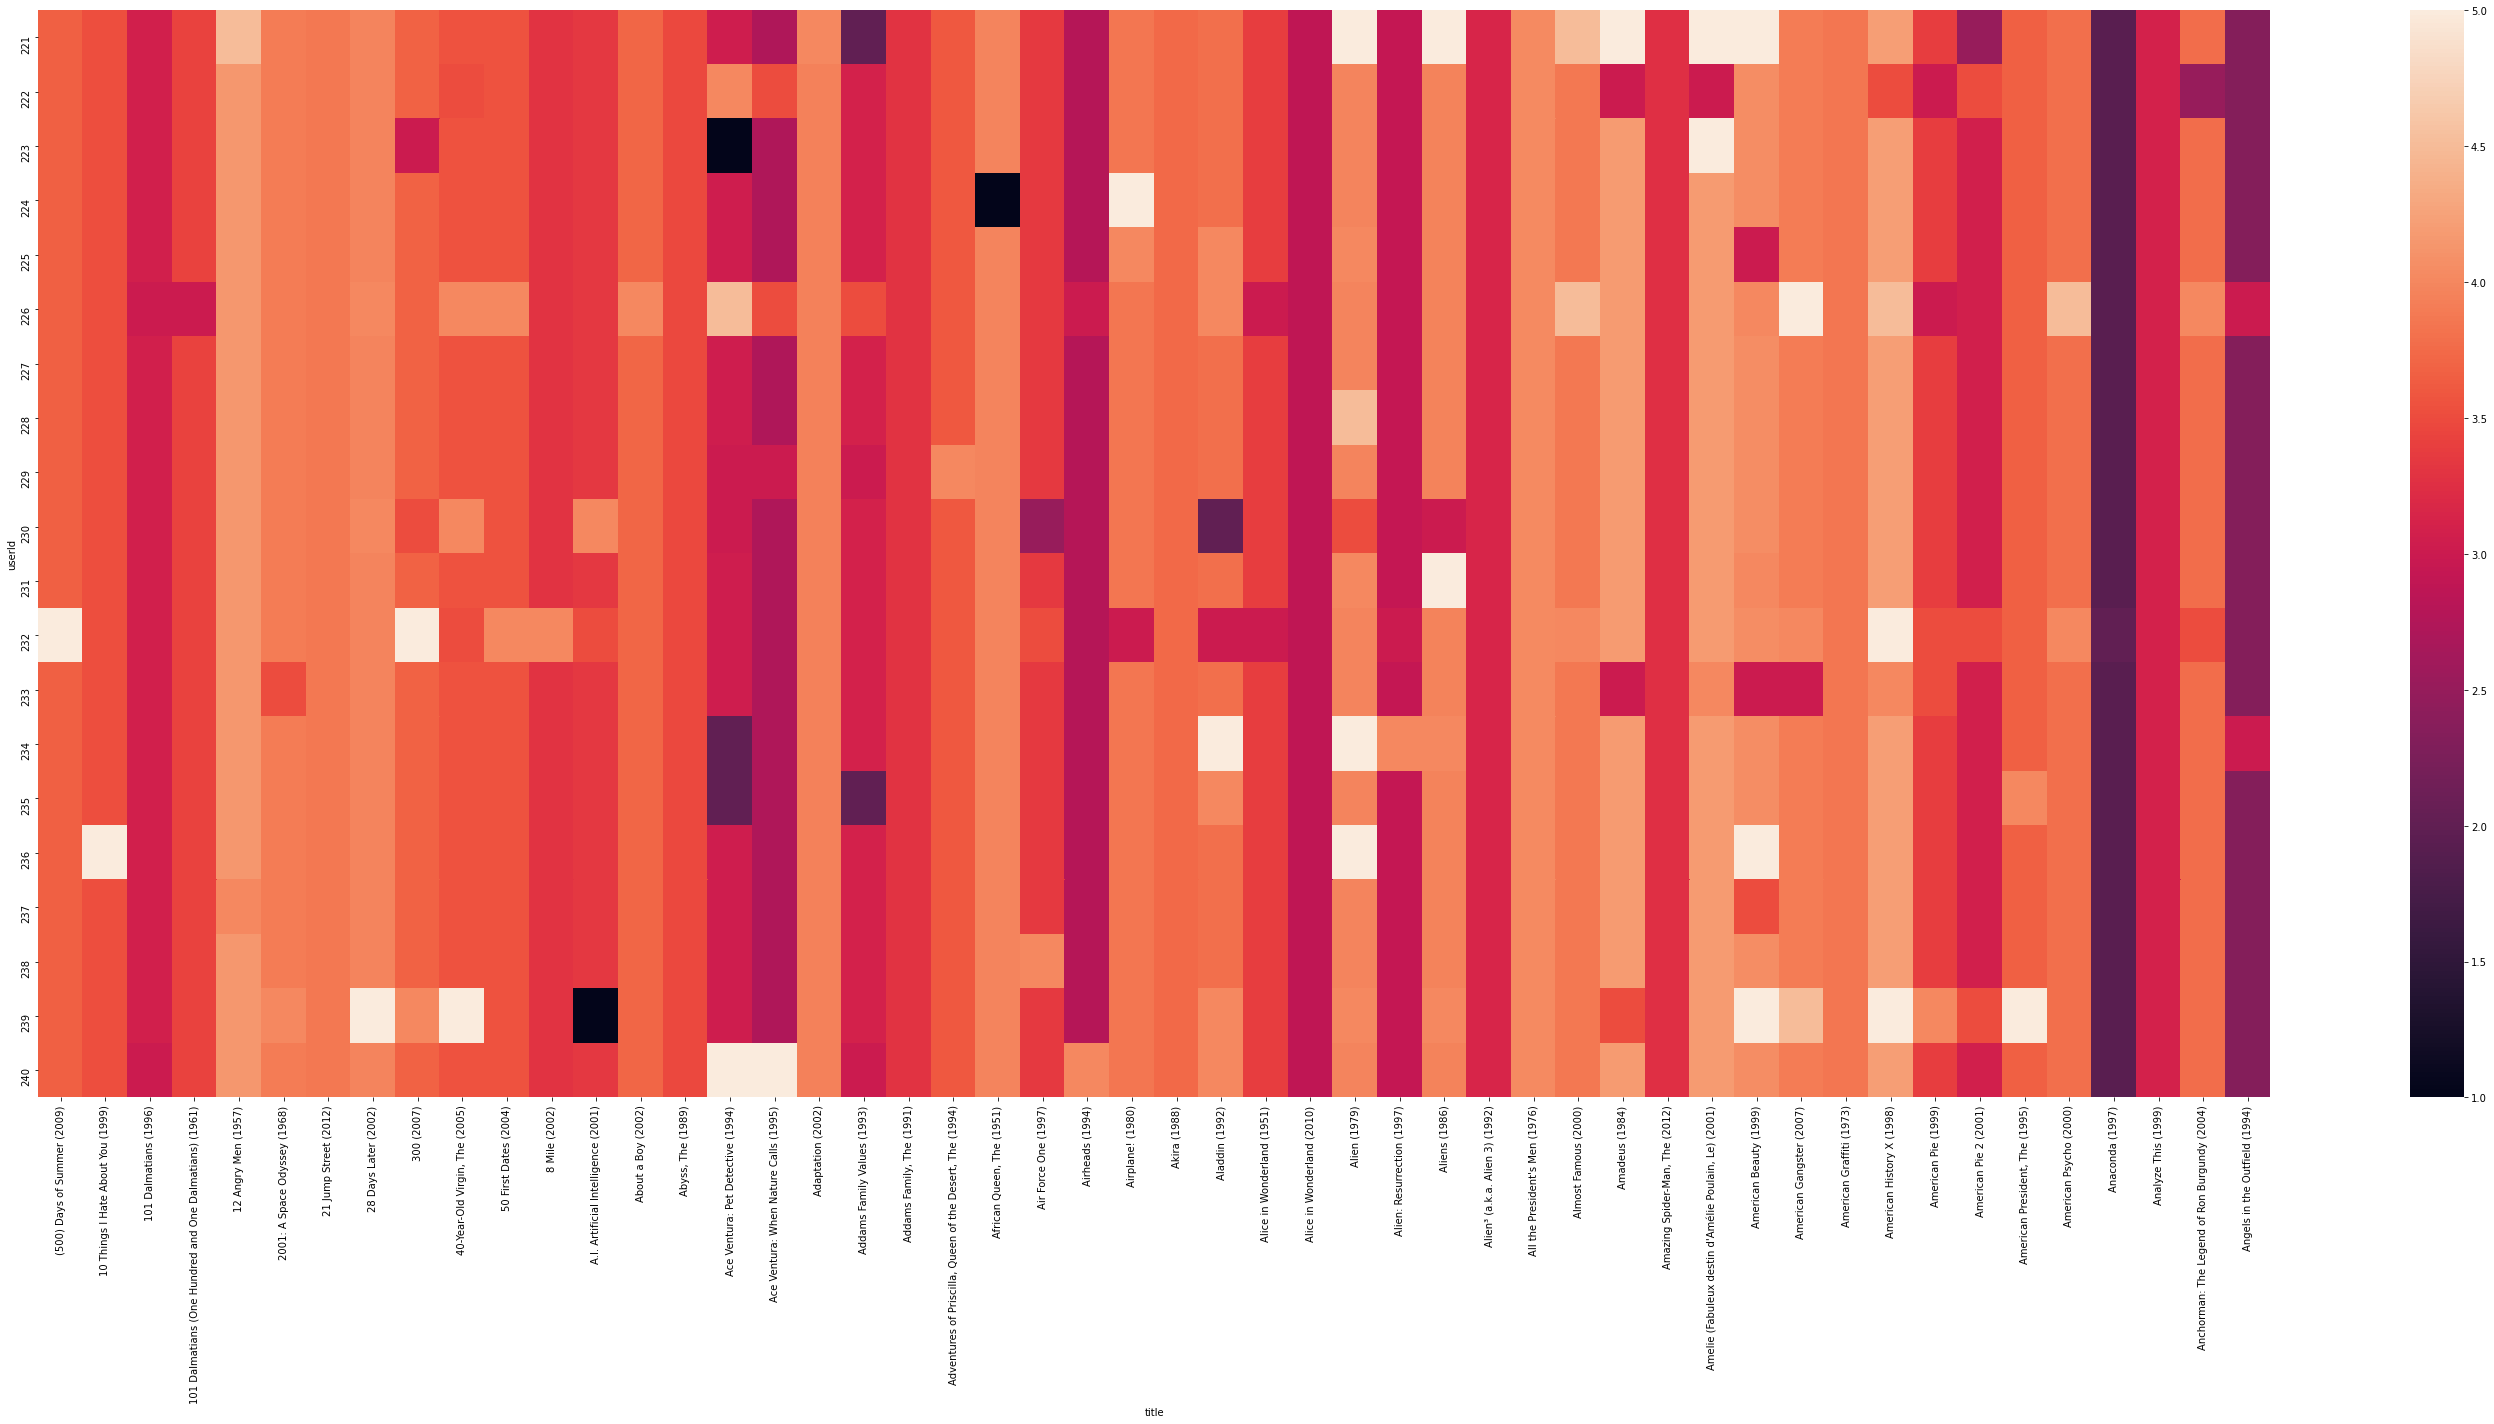

In [183]:
heatmap_plot(data_scaled, 2)


74


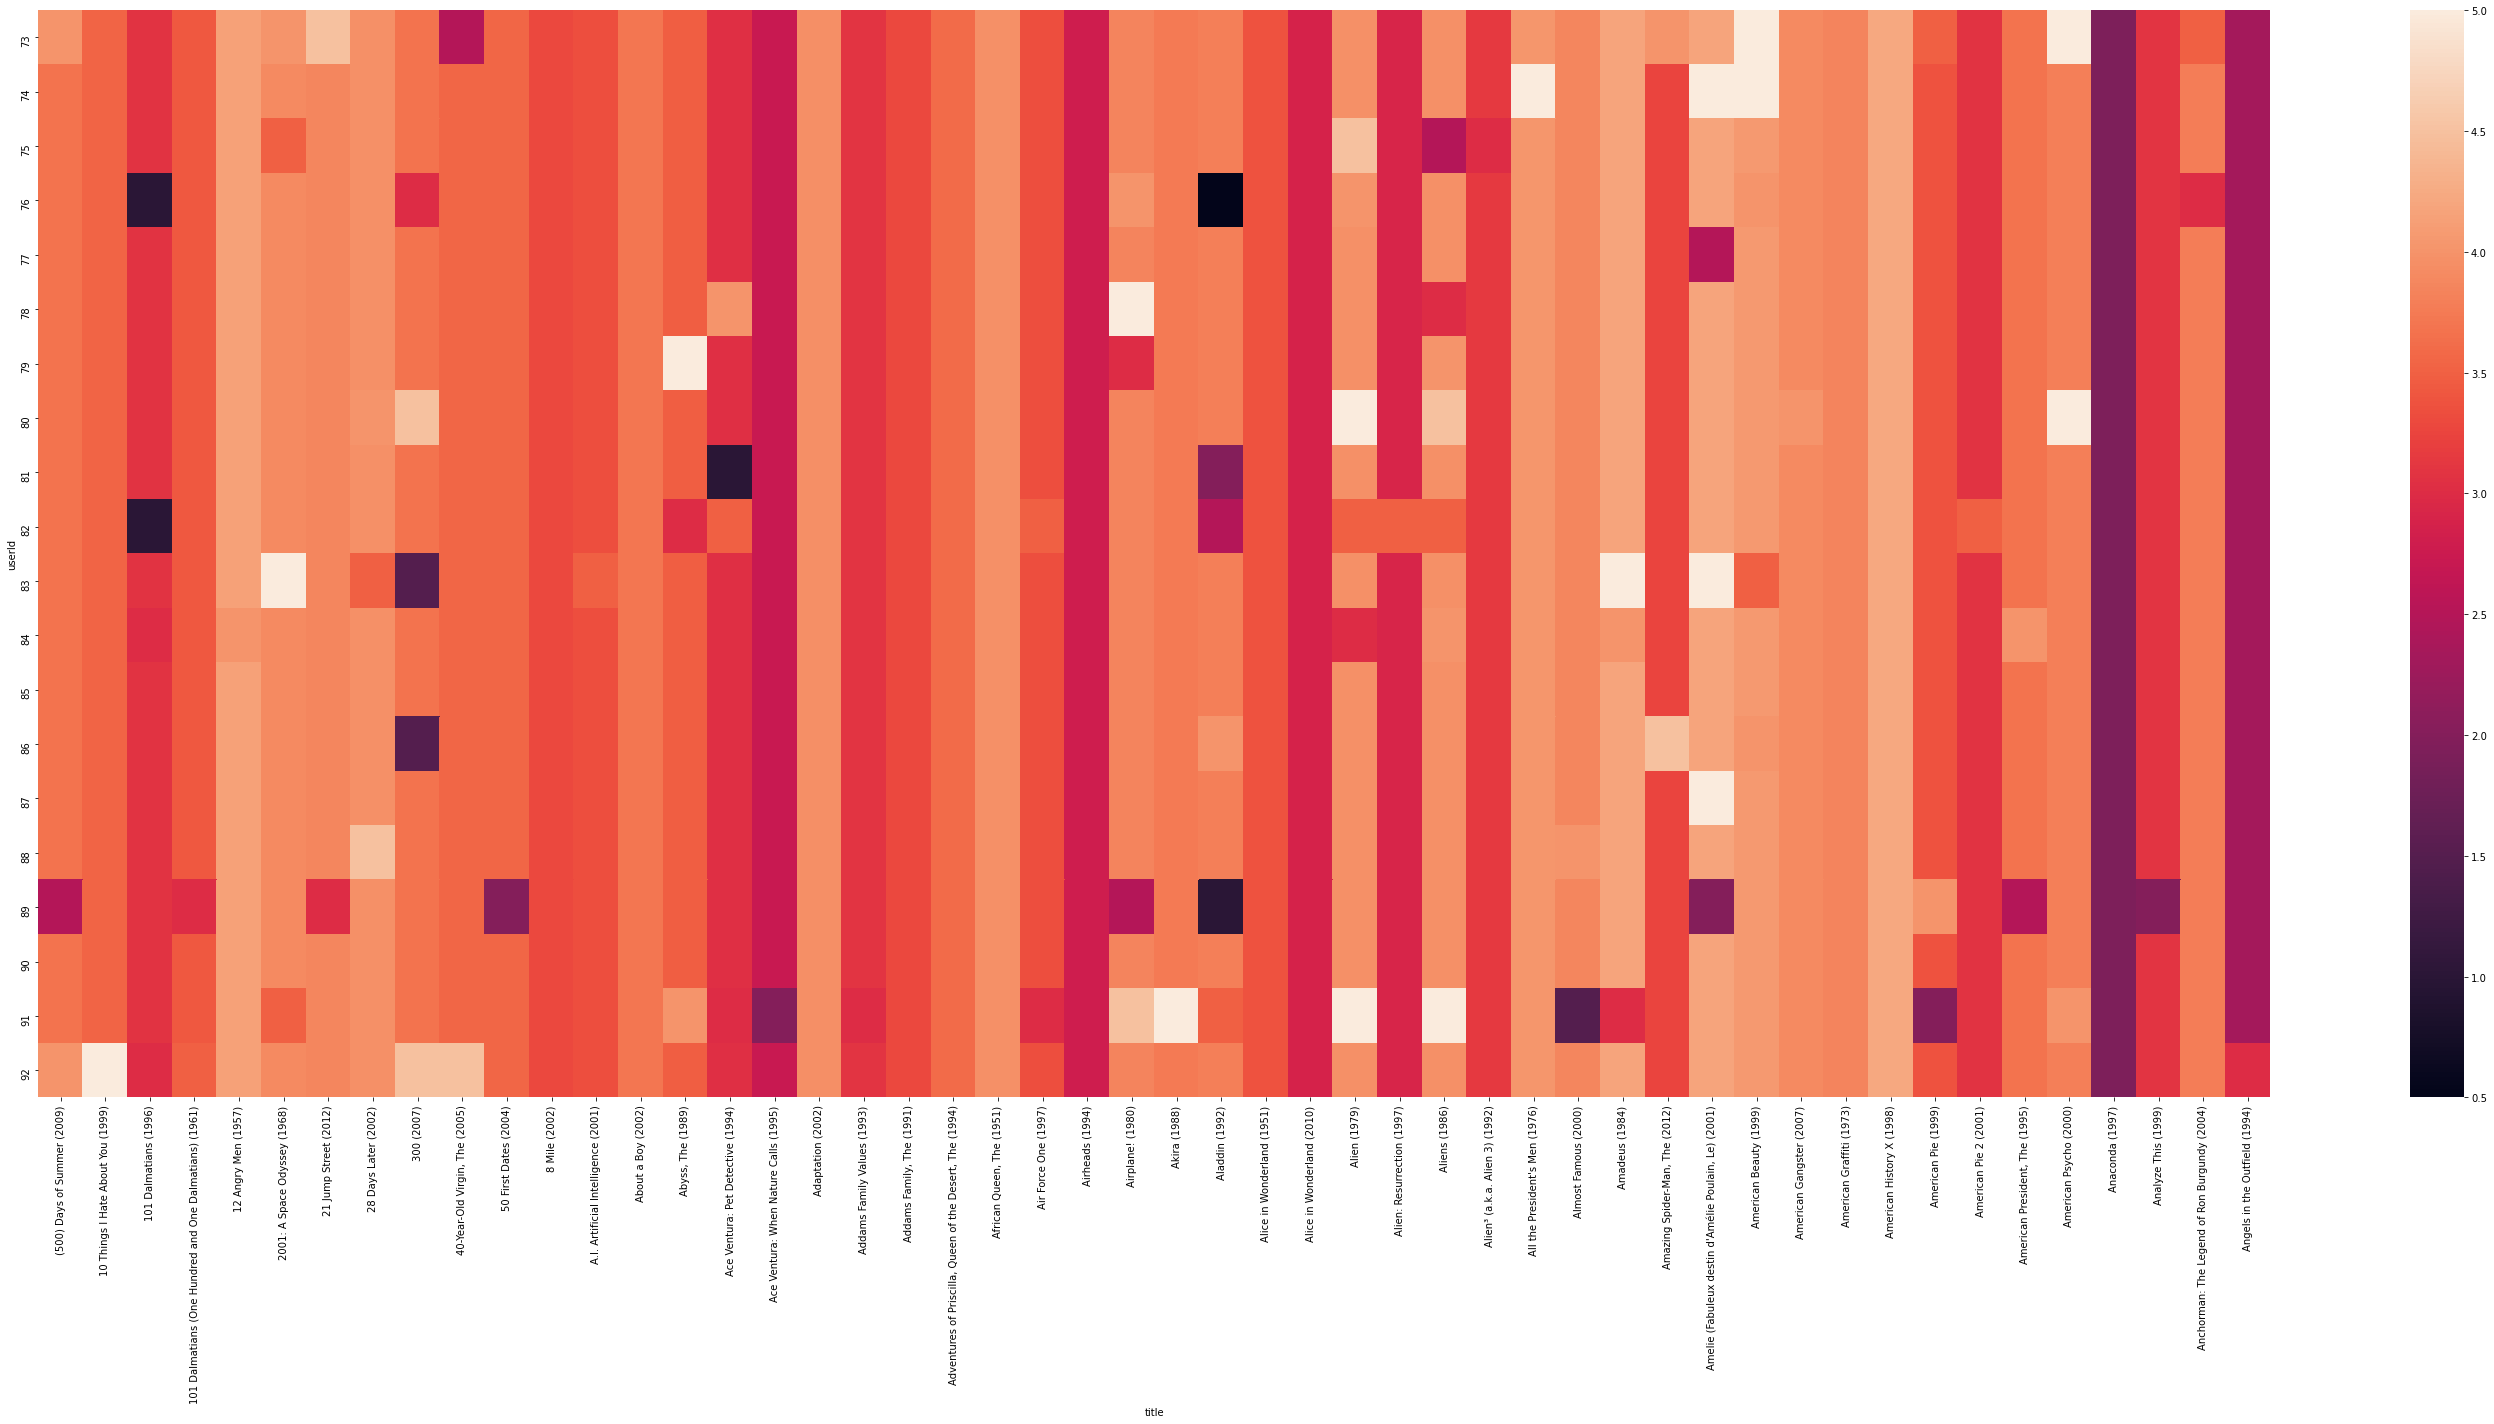

In [184]:
heatmap_plot(data_scaled, 3)


77


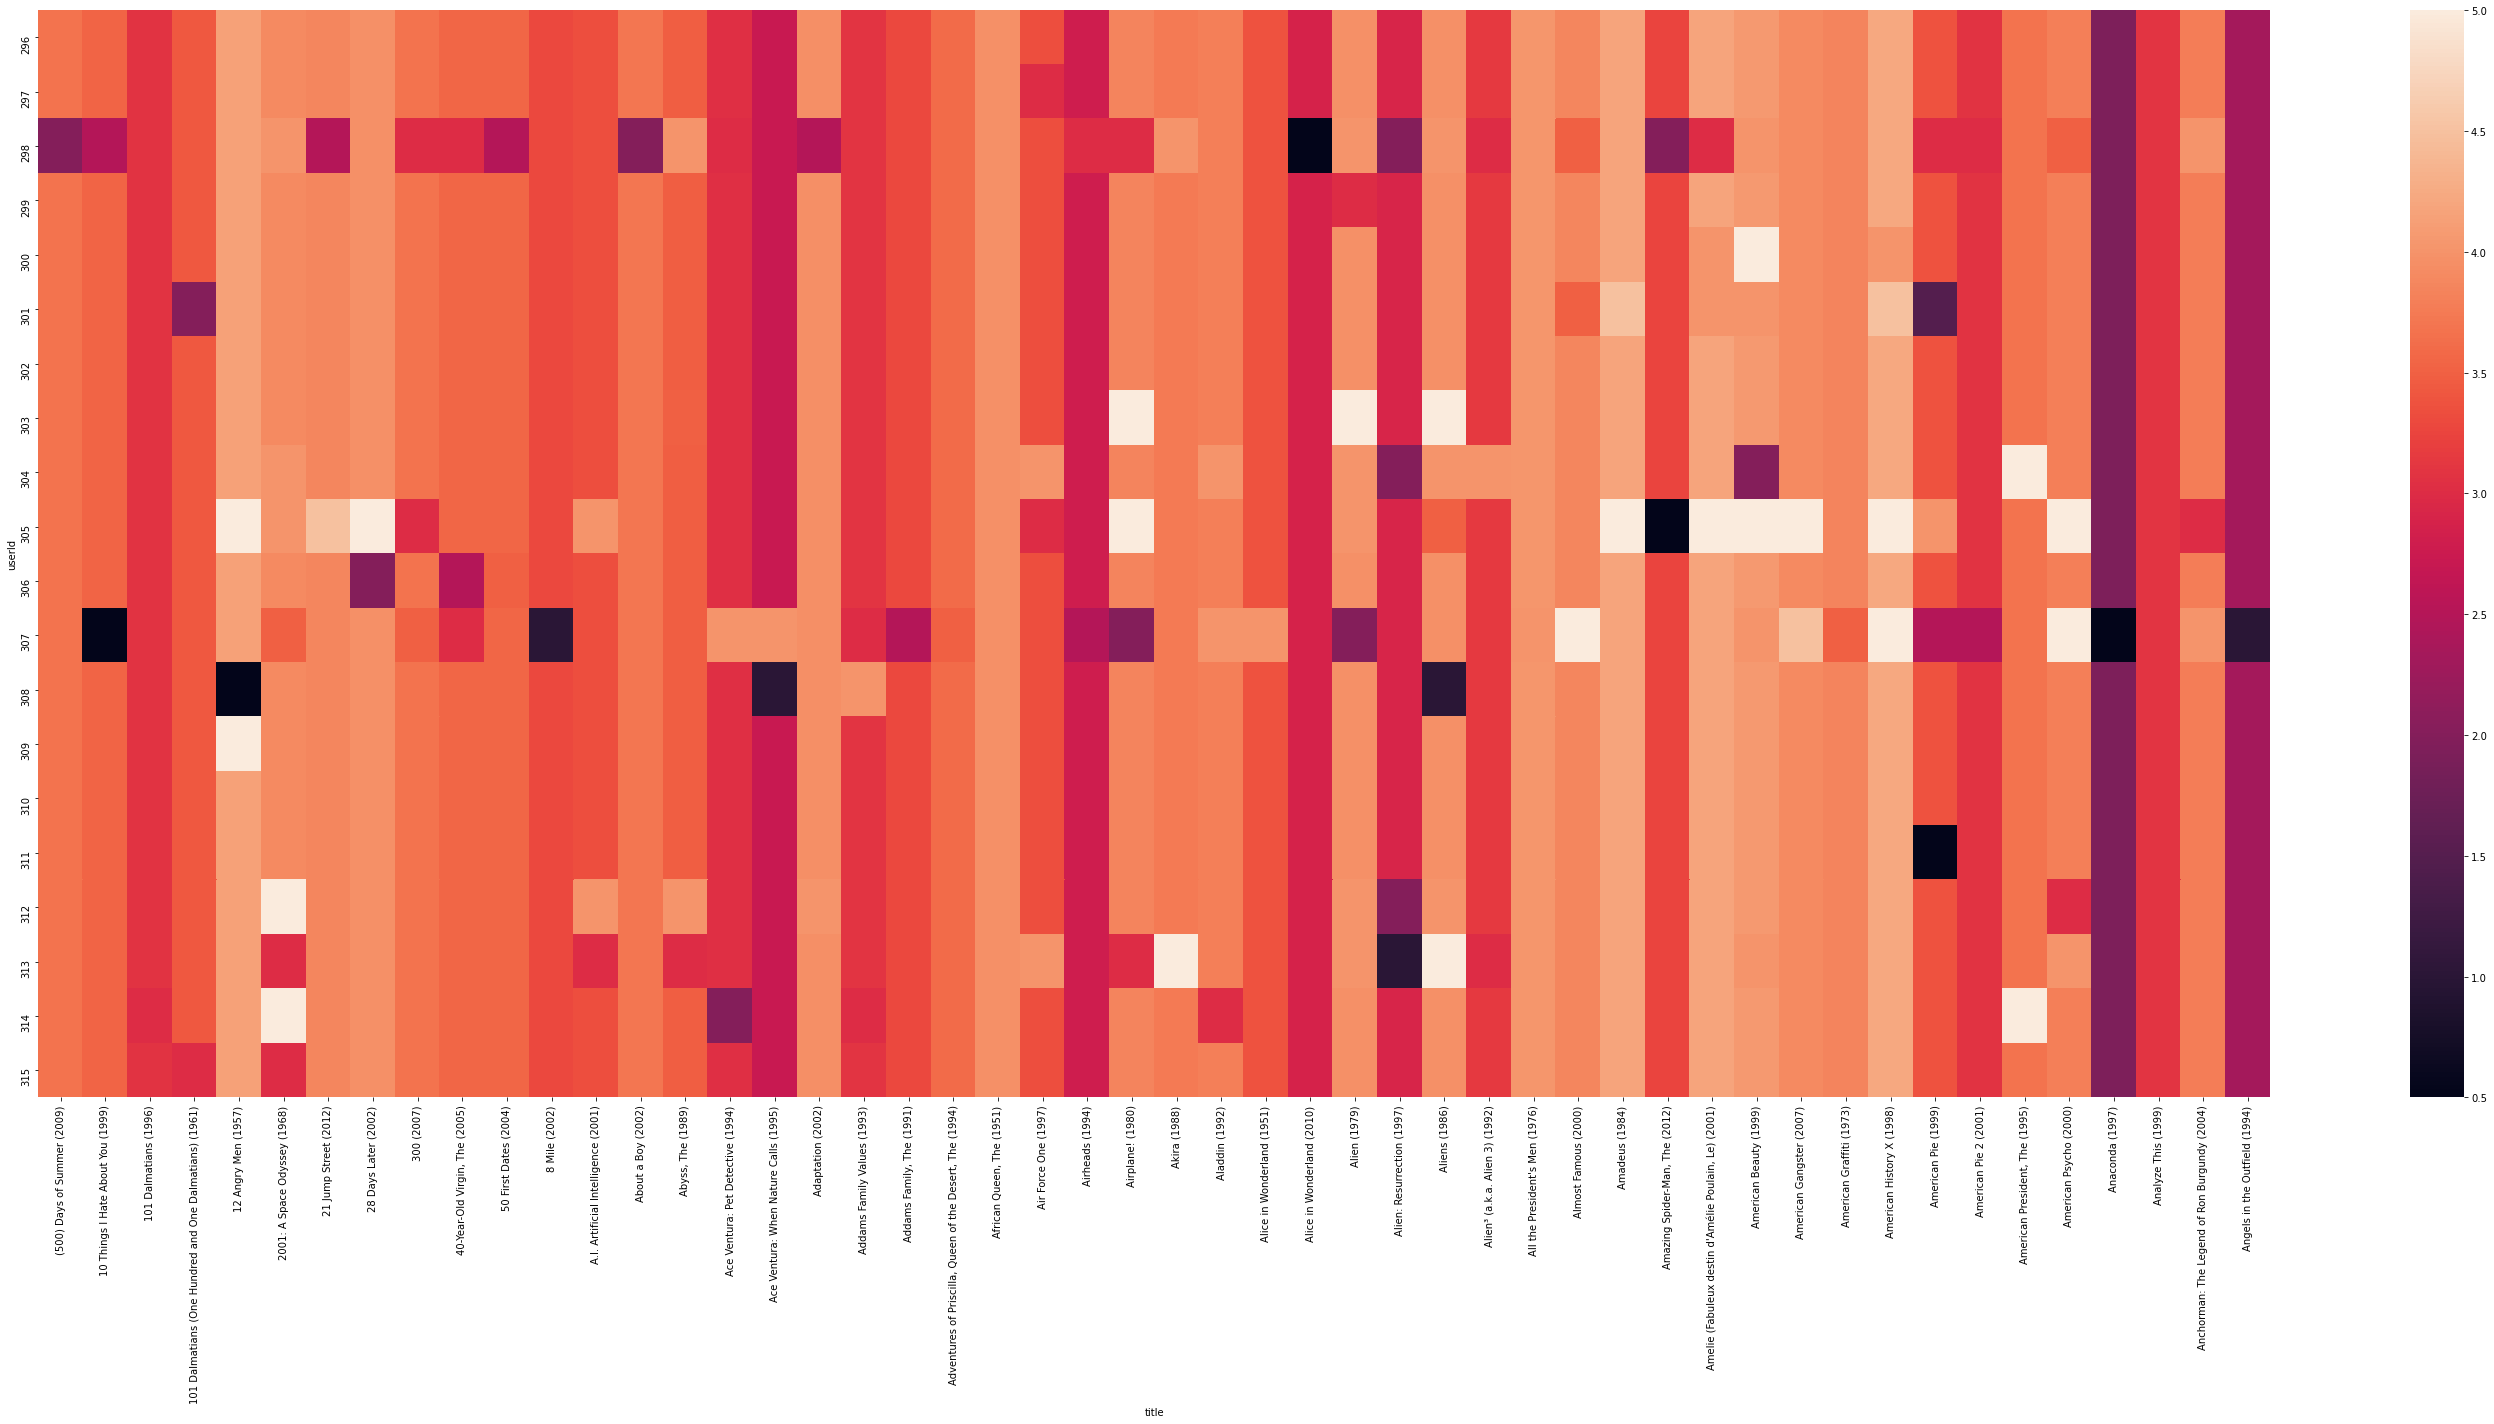

In [185]:
heatmap_plot(data_scaled, 4)


74


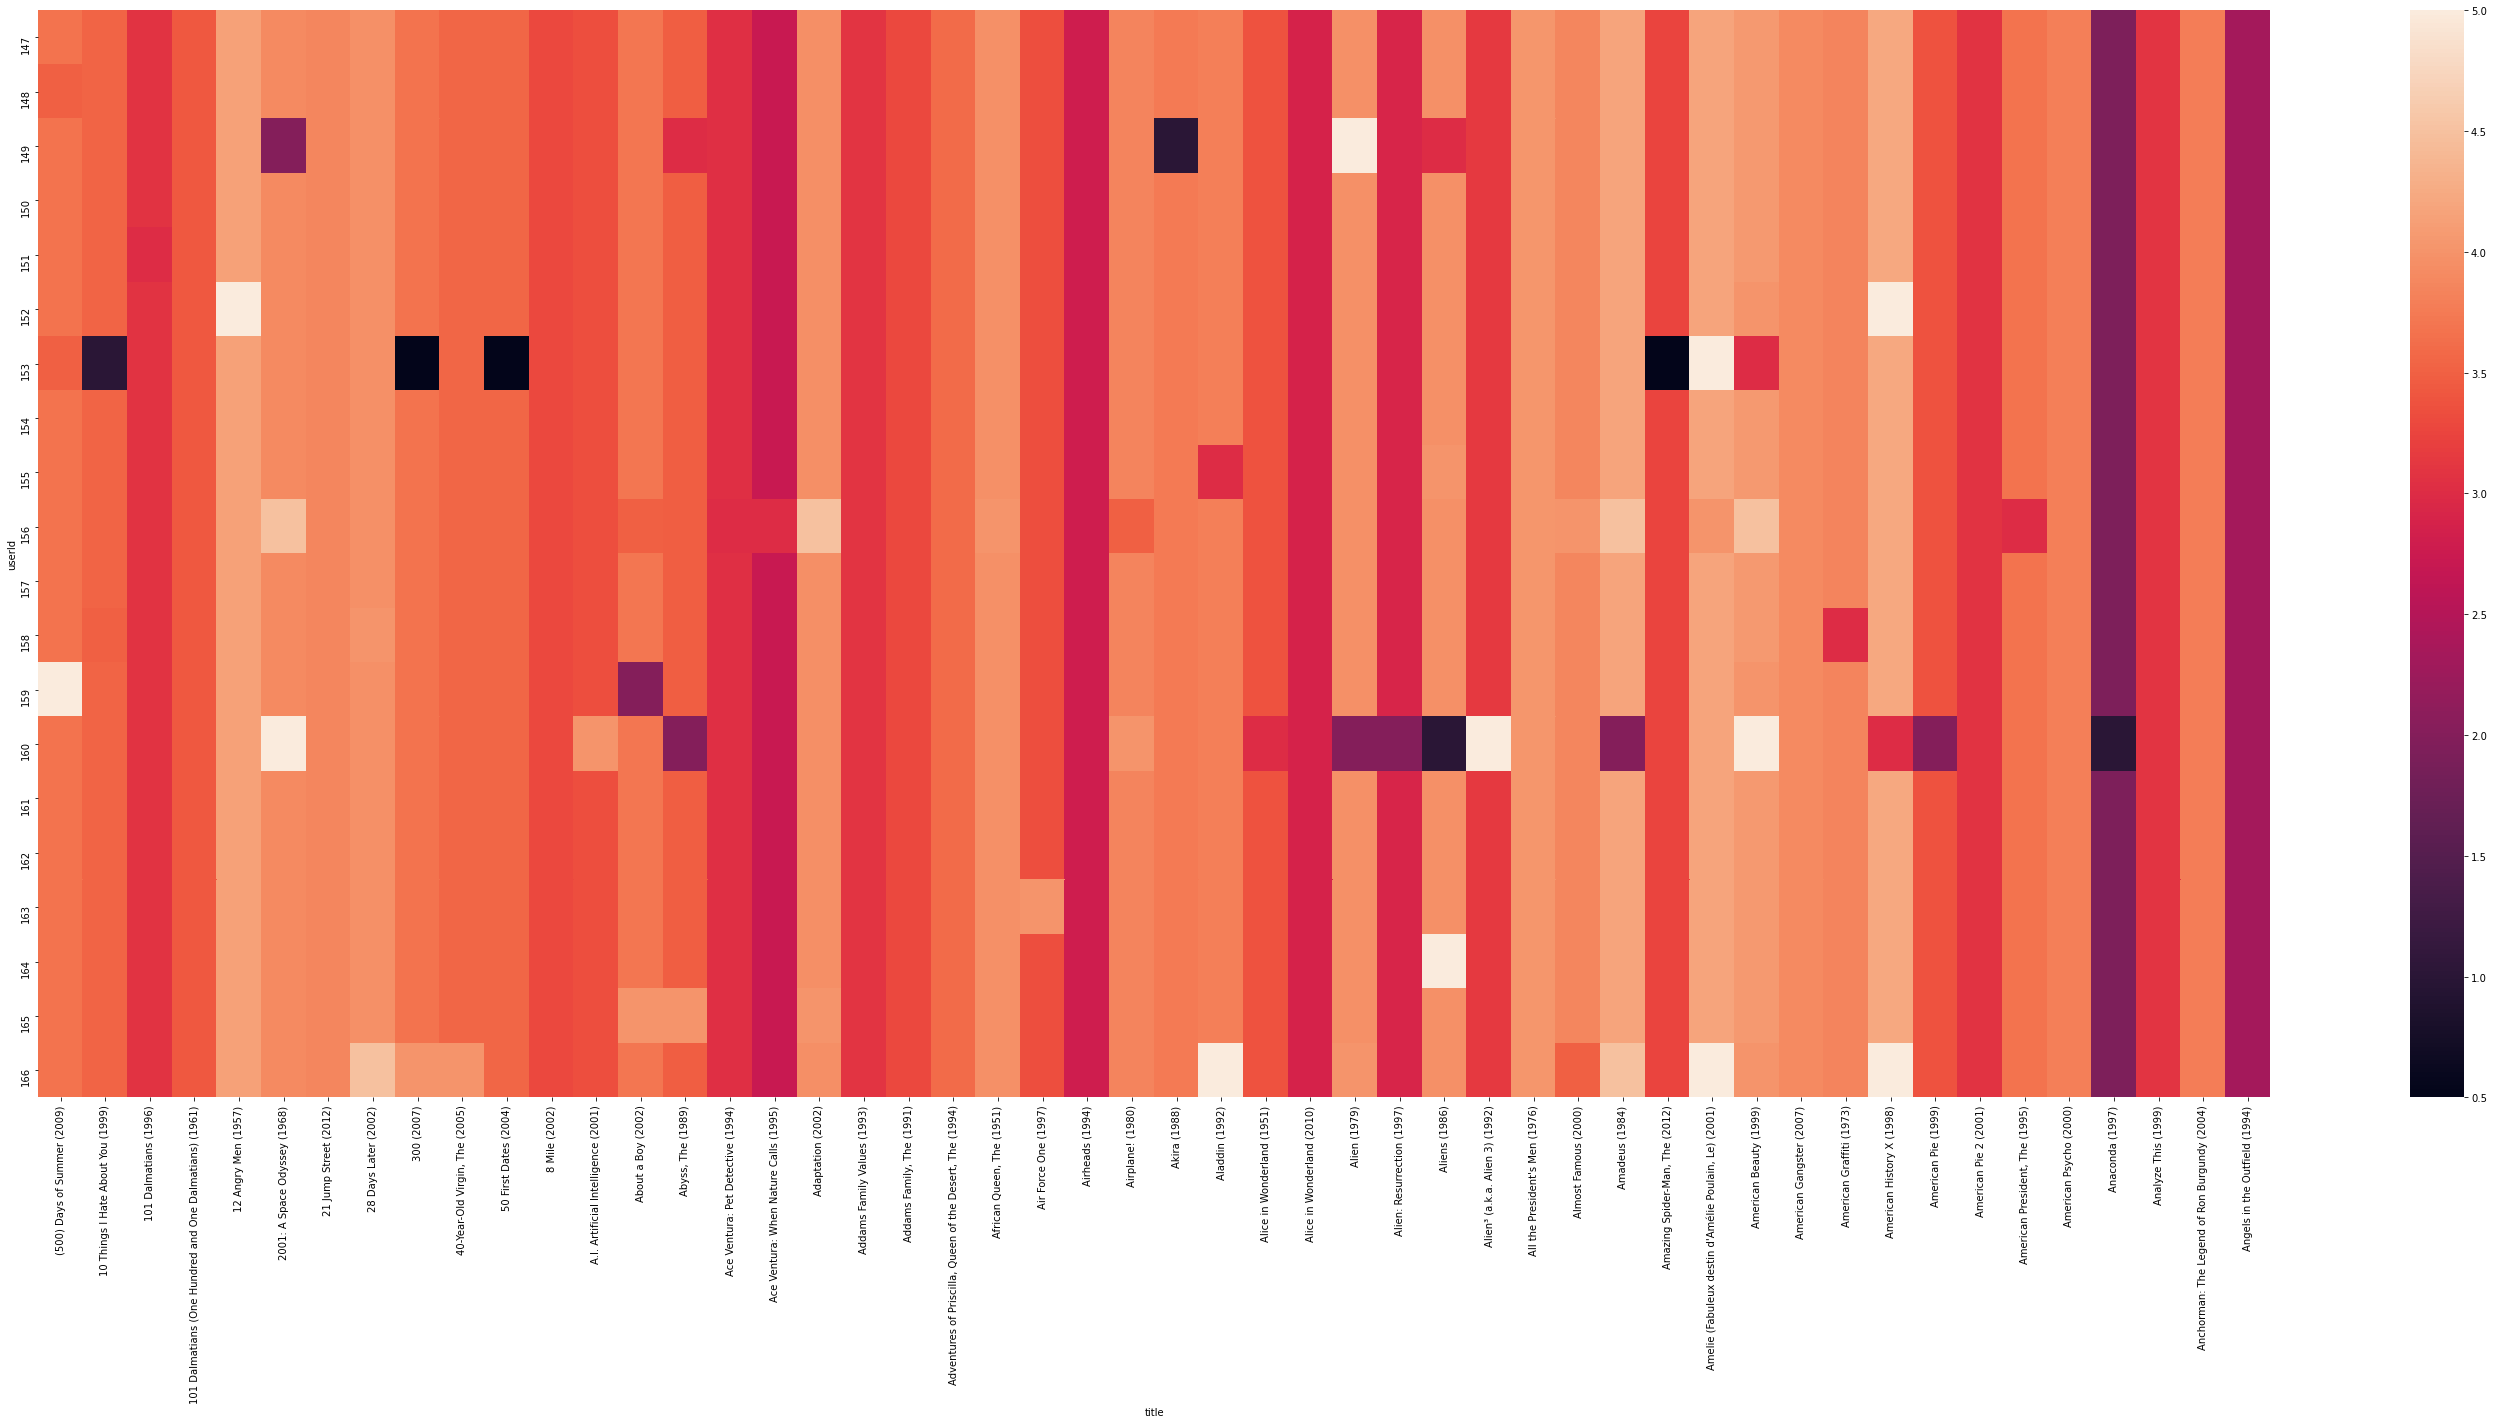

In [186]:
heatmap_plot(data_scaled, 5)


72


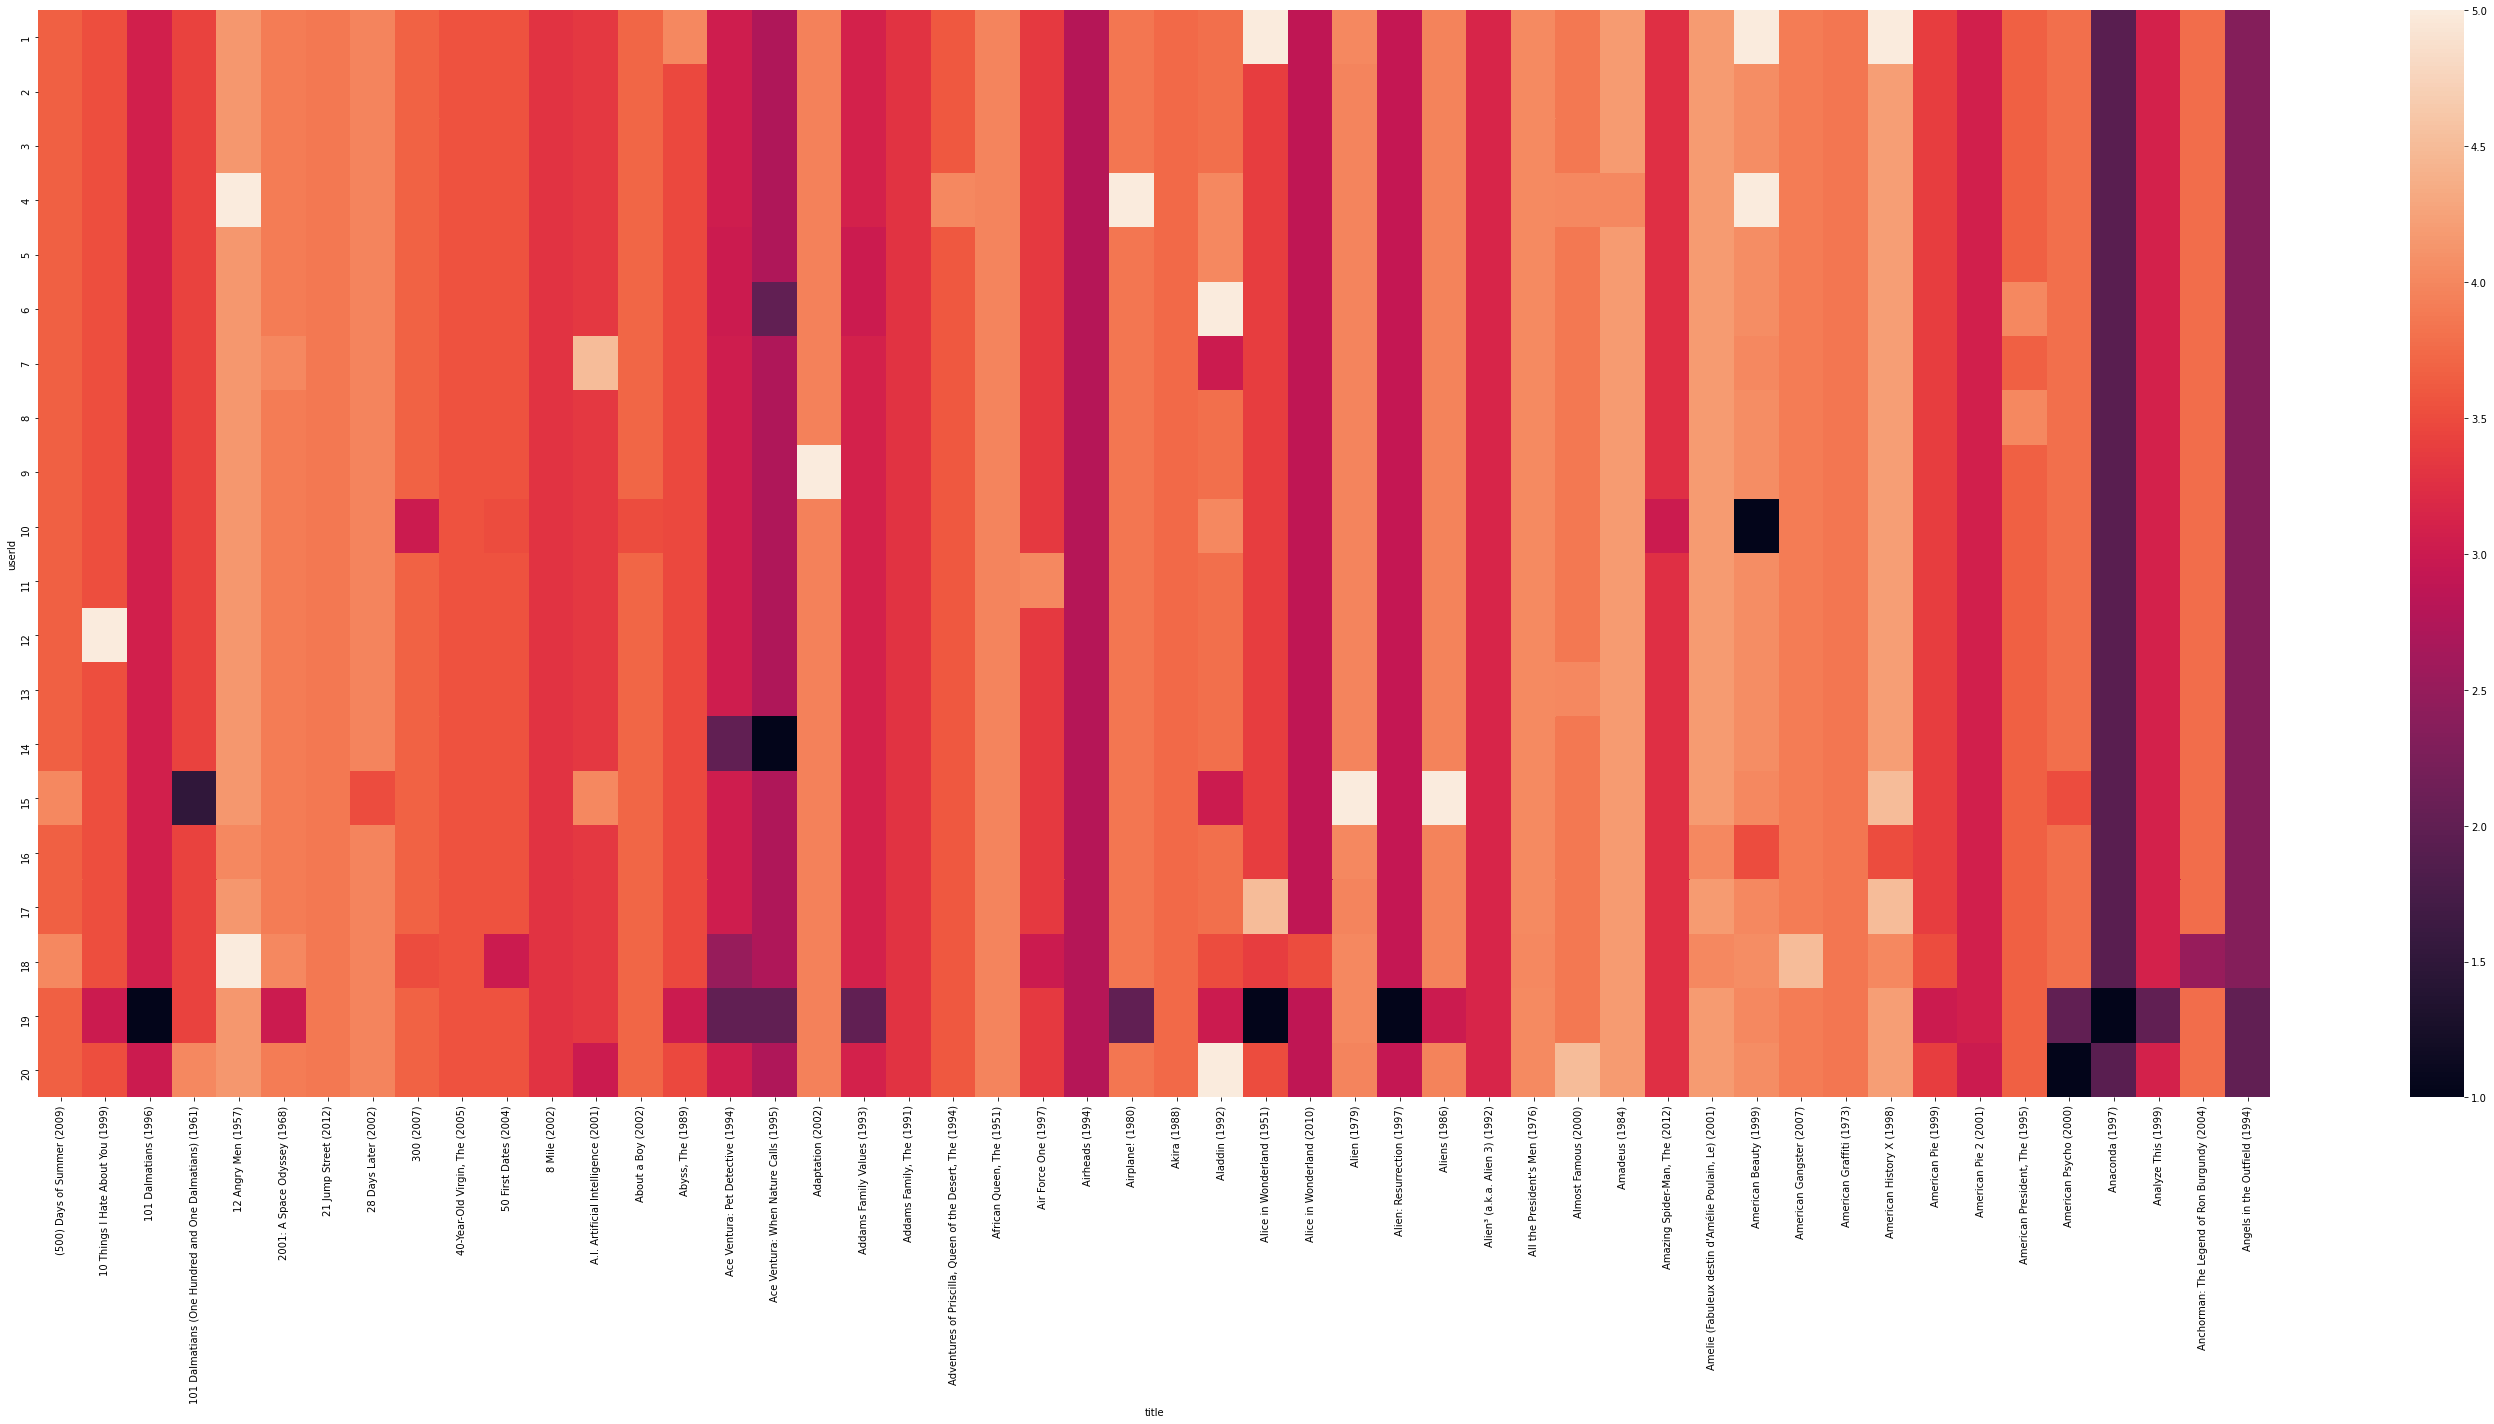

In [187]:
heatmap_plot(data_scaled, 6)


79


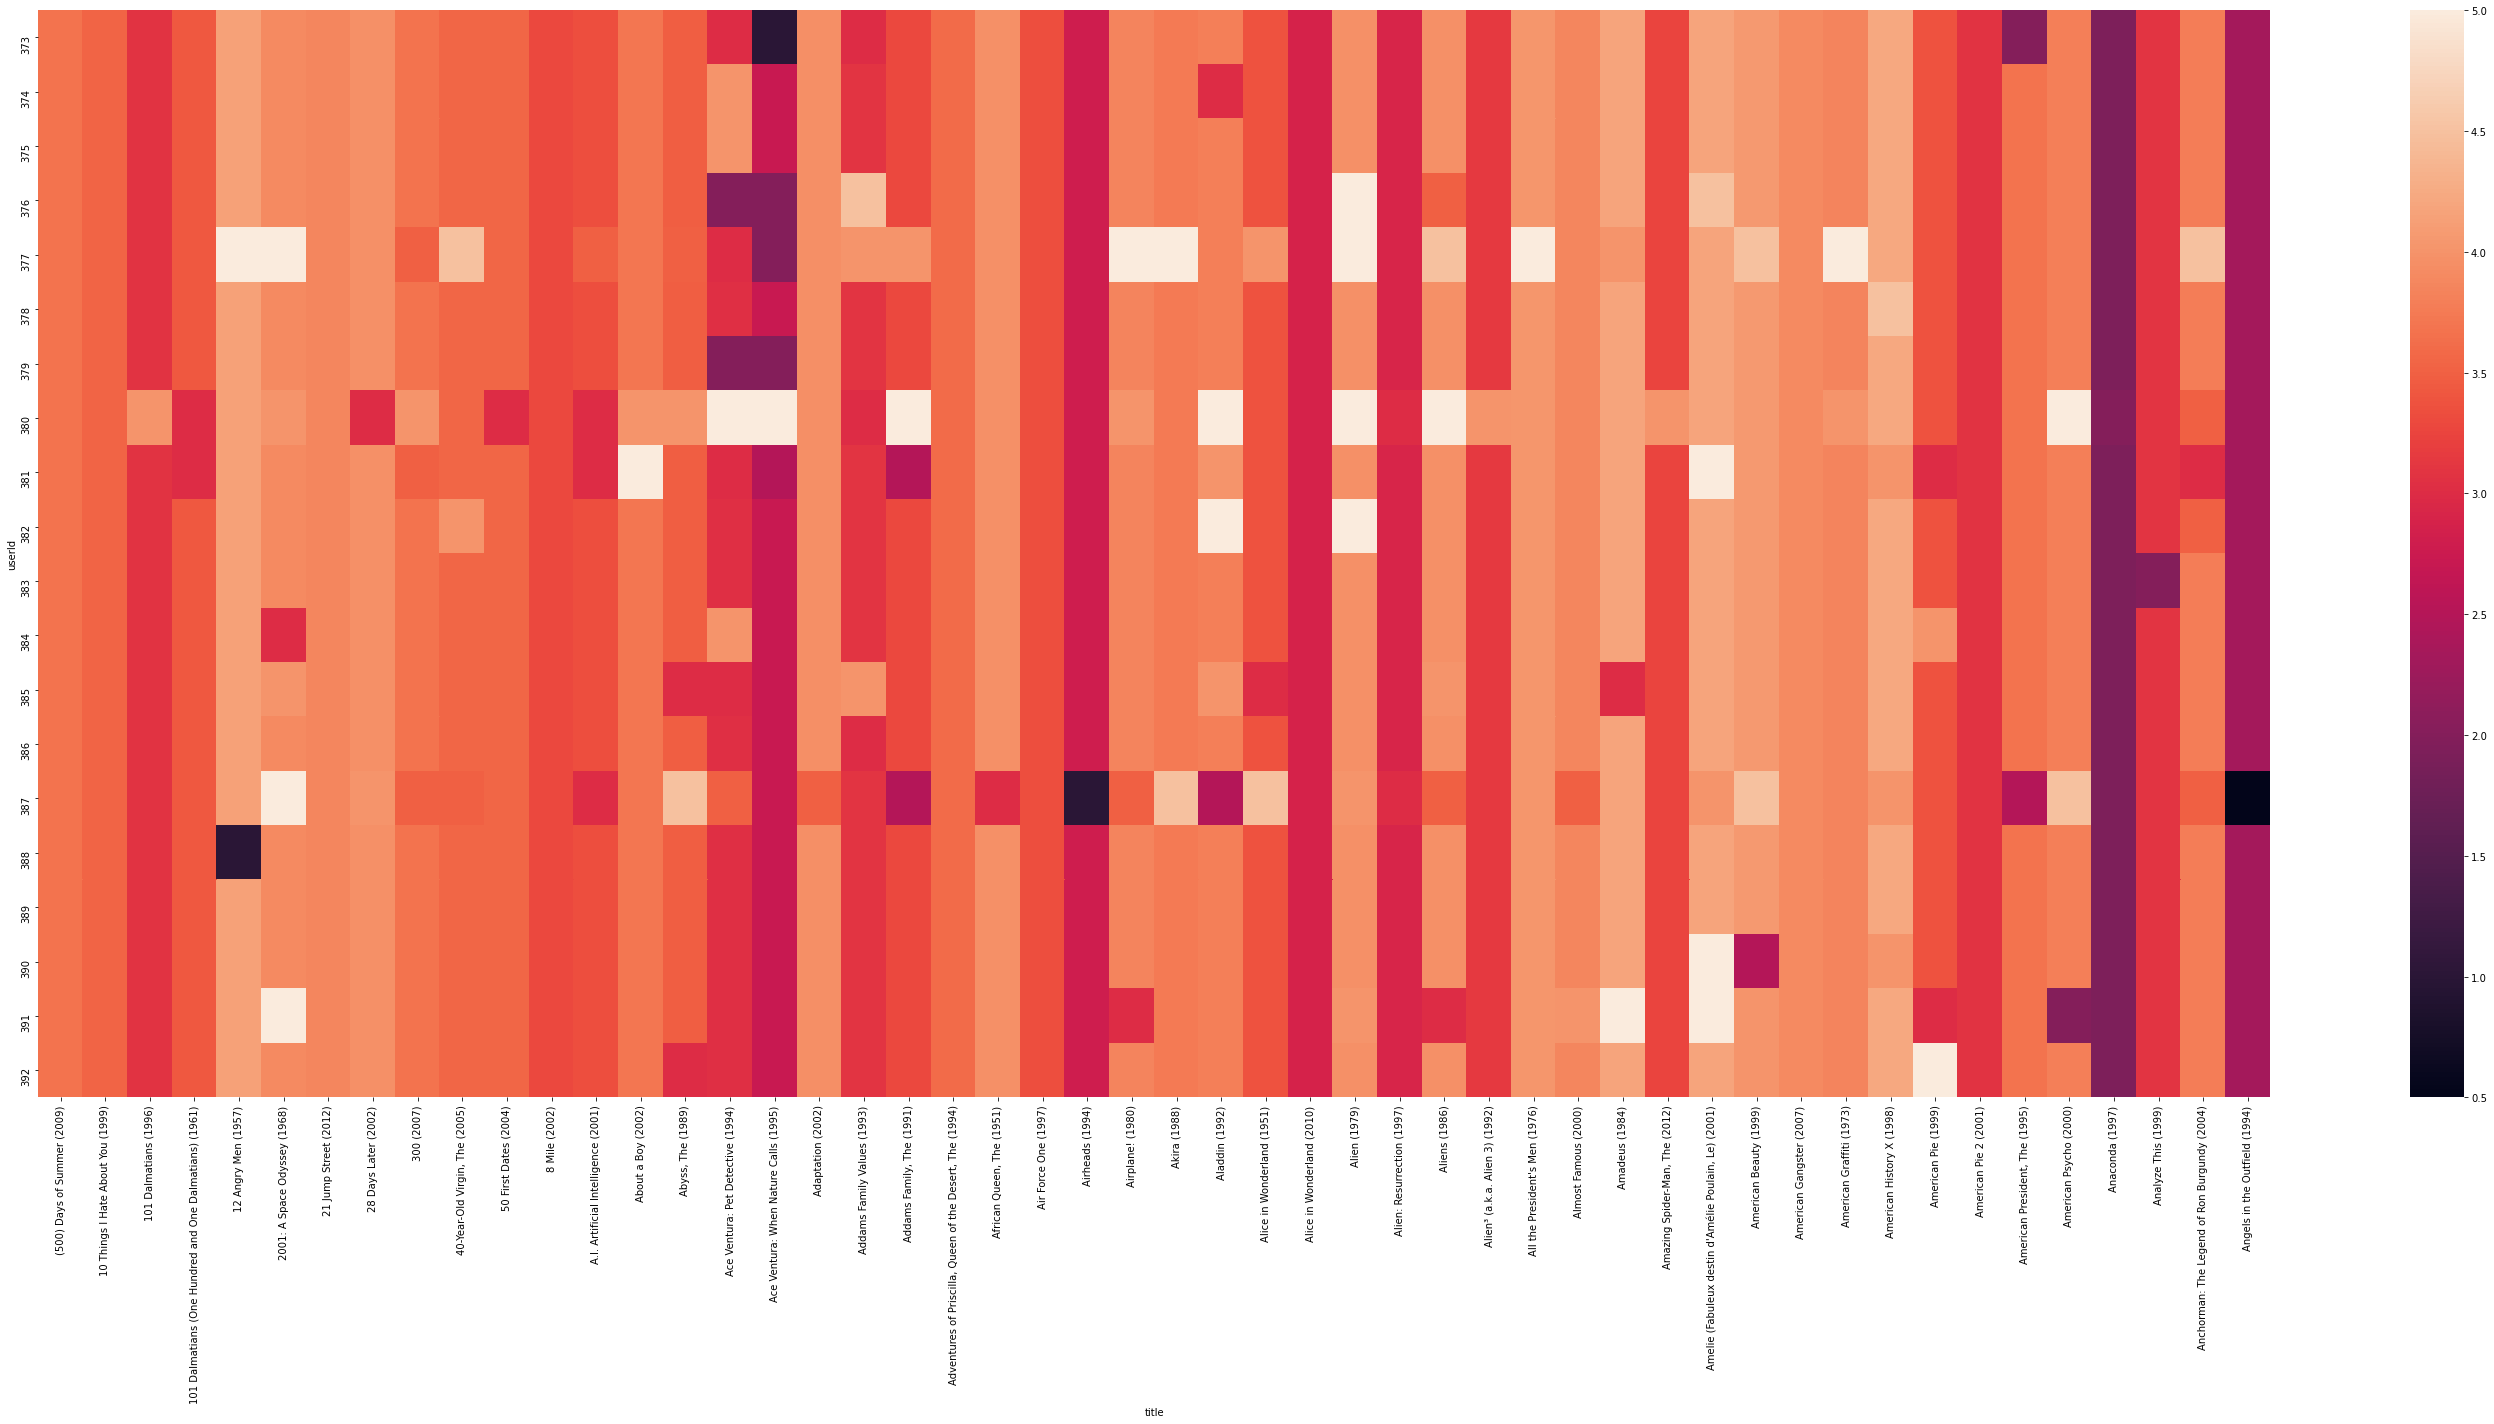

In [188]:
heatmap_plot(data_scaled, 7)
